<a href="https://colab.research.google.com/github/abinashgochhayat1998/BasicMachineLearningAlgorithms/blob/main/LinearRegressionUsingGradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import all the required packages
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

##load our data set from computer 
import io
from google.colab import files
uploaded = files.upload()

Saving AirfoilSelfNoise.csv to AirfoilSelfNoise (3).csv


In [ ]:
dataframe = pd.read_csv(io.BytesIO(uploaded['AirfoilSelfNoise.csv']))
dataframe.head() 

,f,alpha,c,U_infinity,delta,SSPL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [ ]:
##Normalise our data frame
Normalised_Data=dataframe
Normalised_Data=Normalised_Data.apply(lambda x: (x-x.min(axis=0))/(x.max(axis=0)-x.min(axis=0)))
dataframe=Normalised_Data
dataframe.head(10)

,f,alpha,c,U_infinity,delta,SSPL
0,0.030303,0.0,1.0,1.0,0.039005,0.606829
1,0.040404,0.0,1.0,1.0,0.039005,0.580238
2,0.053030,0.0,1.0,1.0,0.039005,0.600181
3,0.070707,0.0,1.0,1.0,0.039005,0.643790
4,0.090909,0.0,1.0,1.0,0.039005,0.640333
5,0.116162,0.0,1.0,1.0,0.039005,0.590076
6,0.148990,0.0,1.0,1.0,0.039005,0.580238
7,0.191919,0.0,1.0,1.0,0.039005,0.523333
8,0.242424,0.0,1.0,1.0,0.039005,0.476534
9,0.308081,0.0,1.0,1.0,0.039005,0.429734


In [ ]:
x_independent_variable = dataframe.iloc[:, :-1].values
y_depenedent_variable = dataframe.iloc[:,1].values
x_independent_variable=np.c_[x_independent_variable,np.ones(y_depenedent_variable.shape)]

print(x_independent_variable)
print(y_depenedent_variable)
x_independent_variable.shape

[[0.03030303 0.         1.         1.         0.03900472 1.        ]
 [0.04040404 0.         1.         1.         0.03900472 1.        ]
 [0.0530303  0.         1.         1.         0.03900472 1.        ]
 ...
 [0.19191919 0.7027027  0.27272727 0.19949495 0.90411066 1.        ]
 [0.24242424 0.7027027  0.27272727 0.19949495 0.90411066 1.        ]
 [0.30808081 0.7027027  0.27272727 0.19949495 0.90411066 1.        ]]
[0.        0.        0.        ... 0.7027027 0.7027027 0.7027027]


(1503, 6)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_independent_variable,y_depenedent_variable, train_size=0.70)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1052, 6)
(1052,)
(451, 6)
(451,)


In [ ]:
#gradient decent algorithm
#gradient decent algorithm
learning_rate = 0.01 #step size
no_of_iterations = 8000
N = y_train.size
np.random.seed(15)
coeff = np.random.rand(6) #m1, m2, m3, m4, m5, c
print("Initial Values of Coefficient : ", coeff)


#Algorithm
def gradientDescentAlgo(x, y, coeff, no_of_iterations, learning_rate):
  past_costs = []
  past_coeff = [coeff]
  for i in range(no_of_iterations):
    prediction = np.dot(x, coeff) #acts as formula of linear regression
    error = prediction - y
    cost = (1/(2*N)) * np.dot(error.T, error) #Loss Function Formula
    past_costs.append(cost)
    der = (1/N) * np.dot(x.T, error) # derivative
    coeff = coeff - der * learning_rate
    past_coeff.append(coeff)
  return past_coeff, past_costs

past_coeff, past_costs = gradientDescentAlgo(X_train, y_train, coeff, no_of_iterations, learning_rate)
coeff = past_coeff[-1]

print("Final Values of Coefficient : ", coeff)      
#print("cost : ", past_costs)

Initial Values of Coefficient :  [0.8488177  0.17889592 0.05436321 0.36153845 0.27540093 0.53000022]
Final Values of Coefficient :  [ 0.06043067  0.80139296 -0.04978627  0.00170286  0.22847907  0.02879807]


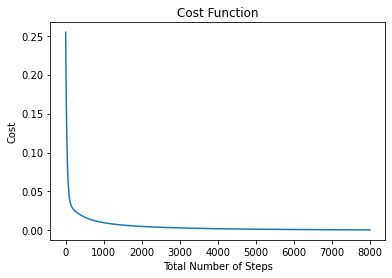

In [ ]:
#plotting the graph
plt.title("Cost Function")
plt.xlabel("Total Number of Steps")
plt.ylabel("Cost")
plt.plot(past_costs)
plt.show()

In [ ]:
#checking our accuracy of our trained model
from sklearn.metrics import mean_squared_error

y_pred = np.dot(X_test, coeff)
error = mean_squared_error(y_test, y_pred)

print("Our Test Accuracy is :", (1- error)*100, "%")
print("our Test error is :", error*100, "%")

Our Test Accuracy is : 99.86768879416334 %
our Test error is : 0.13231120583665618 %
